# Medical appointment analysis

- 데이터 출처 : <a href='https://www.kaggle.com/joniarroba/noshowappointments'>Kaggle</a>
- 데이터 종류 : 환자가 의사에게 진단을 받고 향후 추가적인 진료 일정을 잡았을 때, 향후 진료를 받으러 오는지 안오는지에 대한 데이터, 그리고 개별 환자들에 대한 개인특성 데이터도 포함되어 있음
- 데이터에서 정의하는 문제 상황 : 환자들의 30%가 향후 진료를 위해 방문하지 않는다는 문제 제시

- 문제상황 : 'A'라는 병원과 제휴를 맺은 IT솔루션 기반 헬스케어 기업은 A병원으로 부터 환자들의 높은 진료 이탈율을 문제로 제시했다. 그리고 이러한 진료 이탈의 원인이 무엇인지 파악해달라는 요청으로 데이터 부서에게 업무가 주어진 상태

- 문제정의 : A병원 환자들의 중도 진료 이탈의 원인을 찾음으로써 A병원의 수익 최적화에 기여하기 위함.


- 가설설정

    * ``여성일수록 향후 진료예약에 더 많이 참여할 것이다.``
        - 왜냐하면 여성이 남성보다 건강에 더 민감한 경향이 있기 때문이다.
         
    * ``향후 진료예약을 등록한 날(time)부터 진료예약 방문날까지 시간이 짧을수록 향후 진료에 참여율이 더 높을 것이다.``
        - 왜냐하면 시간이 오래될수록 예약한 진료에 대한 기억이 희미해질 것이기 때문이다.
    * ``SMS 문자를 받은 환자일 수록 향후 예약진료에 참여할 가능성이 높을 것이다.``
        - SMS 문자가 리마인드 기능을 할 것으로 예상
    

## Data field

- 01 - PatientId: Identification of a patient
- 02 - AppointmentID: Identification of each appointment
- 03 - Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
- 04 - DataMarcacaoConsulta: The day of the actuall appointment, when they have to visit the doctor.
- 05 - DataAgendamento: The day someone called or registered the appointment, this is before appointment of course.
- 06 - Age: How old is the patient.
- 07 - Neighbourhood: Where the appointment takes place.
- 08 - Scholarship: True of False . Observation, this is a broad topic, consider reading this article 
- 09 - Hipertension: True or False
- 10 - Diabetes: True or False
- 11 - Alcoholism: True or False
- 12 - Handcap: True or False
- 13 - SMS_received: 1 or more messages sent to the patient.
- 14 - No-show: True or False.``(Target Variable)``


## Data cleansing

In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('/Users/younghun/Desktop/gitrepo/data')

In [2]:
medical = pd.read_csv('KaggleV2-May-2016.csv', encoding='utf-8')
medical.shape

(110527, 14)

In [3]:
#결측치 확인하기 -> 깨끗하다!
medical.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [4]:
#결측치가 공백으로 되어있는건 아닌지 dtype을 보고 분명히 수치형 변수이어야 하는데 object타입으로 되어 있는지 보기
medical.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
# 데이터 미리보기
medical.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# 중복 데이터 여부 확인하기 -> 모두 unique한 데이터들
medical.duplicated().sum()

0

In [7]:
# 2번 이상 기록된 환자들 있는지 PatientID로 찾아보기
# df[df.duplicated()] => 중복된 행들 중 최초의 행을 제외한 나머지 행들 모두 출력함!
medical[medical['PatientId'].duplicated()].head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27,1.215484e+13,5628345,F,2016-04-27T10:51:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0,No
154,1.925263e+10,5636933,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
288,2.246214e+13,5532908,M,2016-03-31T12:39:06Z,2016-04-29T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,1,Yes


In [8]:
# 주어진 가설들을 검정하기 위해서 개별 환자들이 누군지는 중요하지 않기 때문에
# PatientId는 삭제하자
medical = medical.drop('PatientId', axis=1)

In [9]:
# AppointmentID는 중복여부 확인하기 -> 진료 ID에 대해서 중복된 건수는 없다.
medical['AppointmentID'].duplicated().sum()

0

In [10]:
# AppointmentID도 삭제하자
del medical['AppointmentID']

In [11]:
# ScheduleDay(실제 병원을 방문한 날)와 AppointmentDay(진료 예약을한 날)을 날짜형으로 바꿔주자
medical['ScheduledDay'] = pd.to_datetime(medical['ScheduledDay'], format='%Y-%m-%d')
medical['AppointmentDay'] = pd.to_datetime(medical['AppointmentDay'], format='%Y-%m-%d')

medical['ScheduledDay'] = medical['ScheduledDay'].dt.date
medical['AppointmentDay'] = medical['AppointmentDay'].dt.date

In [12]:
# 예약날짜, 방문날짜로 파생변수 생성
# date_diff : '방문한날짜 - 진료예약한날짜' 로 파생변수 생성
def create_date_diff(row):
    row['date_diff'] = row['AppointmentDay'] - row['ScheduledDay']
    row['date_diff'] = row['date_diff'].astype(str).str.split(' ', expand=True)[0]
    return row

In [13]:
medical = create_date_diff(medical)
medical.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,date_diff
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


## 첫 번째 가설검정

- 여성일수록 향후 진료예약에 더 많이 참여할 것이다.

In [14]:
# 성별과 No-show 변수 기준으로 그룹핑하기
gender_df = medical.groupby(['Gender','No-show'])['Age'].count()
gender_df = gender_df.reset_index()

In [15]:
# 비율로 나타내기 위해서 여성,남성 진료건수 총합 구하기
total_M = medical.loc[medical['Gender'] == 'M'].shape[0]
total_F = medical.loc[medical['Gender'] == 'F'].shape[0]
print('남자 예약 총 건수: ', total_M)
print('여자 예약 총 건수: ', total_F)

남자 예약 총 건수:  38687
여자 예약 총 건수:  71840


In [16]:
# 조건문으로 비율 변수 생성
gender_df['ratio'] = ''

for idx in range(len(gender_df)):
    if gender_df.loc[idx, 'Gender'] == 'F':
        gender_df.loc[idx, 'ratio'] = gender_df.loc[idx, 'Age'] / total_F
    else:
        gender_df.loc[idx, 'ratio'] = gender_df.loc[idx, 'Age'] / total_M

In [17]:
gender_df

,Gender,No-show,Age,ratio
0,F,No,57246,0.796854
1,F,Yes,14594,0.203146
2,M,No,30962,0.800321
3,M,Yes,7725,0.199679


<AxesSubplot:xlabel='Gender', ylabel='ratio'>

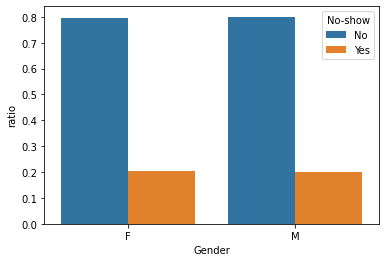

In [18]:
# 시각화하기
import seaborn as sns

sns.barplot(x='Gender', y='ratio', hue='No-show', data=gender_df)

### 가설 검정 결과
- 여성이 남성보다 건강 염려하는 마음이 강해서 No-show 비율이 여성이 더 높을거라고 예상했지만 결과는 아니였다.
- No-show 건수의 절대적 숫자를 고려하지 않고 성별 전체적인 진료건수를 고려해 **비율**
로 계산함

- ``첫 번째 가설인 '여성이 남성보다 향후 진료에 더 참석율이 높을 것이다'는 기각``해야 한다. 남자과 여자 사이의 No-show 비율이 동일

## 두 번째 가설검정

- 향후 진료예약을 등록한 날(time)부터 진료예약 방문날까지 시간이 짧을수록 향후 진료에 참여율이 더 높을 것이다.

In [19]:
# 시계열 변수 아님 -> 따라서 x축에 date_diff를 놓으면 안됨
# No-show의 label별로 date_diff 값의 평균값을 출력해보자.
medical['date_diff'] = medical['date_diff'].astype(int)
date_diff_show = medical.groupby('No-show')['date_diff'].mean()
date_diff_show

No-show
No      8.754659
Yes    15.831489
Name: date_diff, dtype: float64

In [20]:
# No-show의 label별로 date_time값들의 히스토그램을 그려보자. 
no_show = medical[medical['No-show'] == 'No']
yes_show = medical[medical['No-show'] == 'Yes']
print('No label shape: ', no_show.shape)
print('Yes label shape: ', yes_show.shape)

No label shape:  (88208, 13)
Yes label shape:  (22319, 13)


- 'Yes' label 즉, 향후 진료를 받지 않은 사람들이 압도적으로 매우 숫자가 적음에도 불구하고 date_diff 평균값은 'Yes' label이 거의 2배가까이 값이 크다! 
    * 따라서, 우선 수치적으로만 보더라도 향후 진료를 받지 않는 사람들('Yes' labe)은 ``진료 예약을한 날로부터 진료방문날이 먼 미래일수록 No-show할 가능성이 큼``을 추론해볼 수 있다.

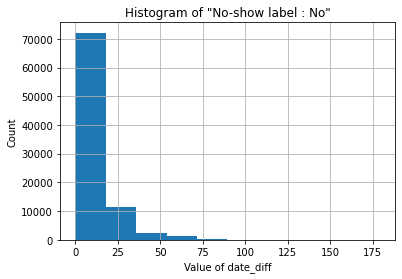

In [21]:
# 향후 진료를 보러 온 사람들의 date_diff 히스토그램
import matplotlib.pyplot as plt
no_show['date_diff'].hist()
plt.title('Histogram of "No-show label : No"')
plt.xlabel('Value of date_diff')
plt.ylabel('Count')
plt.show()

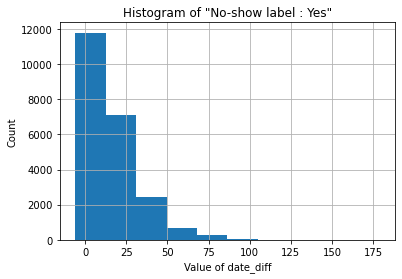

In [22]:
# 향후 진료를 보러오지 않은 사람들의 date_diff 히스토그램
yes_show['date_diff'].hist()
plt.title('Histogram of "No-show label : Yes"')
plt.xlabel('Value of date_diff')
plt.ylabel('Count')
plt.show()

- 두 개의 히스토그램을 그려본 결과,
    * 향후 진료를 보러 오지 않았던 사람들은 'date_diff'값이 큰 사람들이 많았다.
    * 즉, 진료를 받는 날이 예약등록을 한 날로부터 시간이 멀수록 향후 진료를 보러오지 않을 상관관계가 있다.

In [23]:
# No-show 값을 레이블인코딩을 실시하고 diff_date변수와의 상관관계 살펴보기
date_show = medical[['date_diff', 'No-show']]
# 설정한 가설이 'date_diff'가 클수록 No-show label이 'Yes'이므로 No-show를 label인코딩 할 때 'Yes'레이블을 '1'로 바꿔주자
show_label = {'No':0, 'Yes':1}
date_show['No-show'] = date_show['No-show'].map(show_label)
date_show.head()

/Users/younghun/opt/anaconda3/envs/venvforpython/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date_diff,No-show
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


### 가설 검정 결과

- date_diff와 No-show 상관관계가 0.19로 나타났다.
- 아주 약간의 양의상관관계가 존재함.
- 따라서, **``예약등록 날(day)로부터 진료방문날 사이의 시간적 거리가 멀수록 진료방문하지 않을 가능성이 높다``**
- 두 번째 가설은 채택할 수 있다.

## 세 번째 가설검정

- SMS 문자를 받은 환자일 수록 향후 예약진료에 참여할 가능성이 높을 것이다.

In [24]:
# SMS_received : 환자에게 문자가 송신됬는지 여부(binary)
medical['SMS_received'].unique()

array([0, 1])

In [25]:
sms_show = medical.groupby(['SMS_received','No-show']).agg({'Gender':'count'}).rename(columns={'Gender':'Counts'})
sms_show = sms_show.reset_index()
sms_show

,SMS_received,No-show,Counts
0,0,No,62510
1,0,Yes,12535
2,1,No,25698
3,1,Yes,9784


In [26]:
no_sms = medical.loc[medical['SMS_received']==0].shape[0]
yes_sms = medical.loc[medical['SMS_received']==1].shape[0]
sms_show['Ratio'] = ''

for idx in range(len(sms_show)):
    if sms_show.loc[idx, 'SMS_received'] == 0:
        sms_show.loc[idx, 'Ratio'] = sms_show.loc[idx, 'Counts'] / no_sms
    else:
        sms_show.loc[idx, 'Ratio'] = sms_show.loc[idx, 'Counts'] / yes_sms
sms_show

,SMS_received,No-show,Counts,Ratio
0,0,No,62510,0.832967
1,0,Yes,12535,0.167033
2,1,No,25698,0.724255
3,1,Yes,9784,0.275745


- 오히려 문자를 수신받지 않은 사람들이 향후 진료를 보러올 비율이 더 높았다.
- 따라서, **``문자를 수신받았다고 해서 향후 진료에 방문할 가능성이 높은 상관관계는 없다.``**
- 그러므로 세 번째 가설은 기각되어야 한다.

## 네 번째 가설

- 질병이 있을 수록 No-show할 가능성이 높을까?

In [50]:
# 질병에 걸렸으면 1값이기 때문에 각 행별로 질병에 해당하는 변수의 값들을 모두 더해서 걸린 질환 갯수 파생변수 생성
disease_df = medical.copy()
disease_df['num_disease'] = ''
def num_disease(row):
    row['num_disease'] = row['Hipertension'] + row['Diabetes'] + row['Alcoholism'] + row['Handcap']
    return row

In [52]:
disease_df = disease_df.apply(num_disease, axis=1)
disease_df['num_disease'].value_counts()

0    80576
1    18013
2     7710
3      624
4       63
5        1
Name: num_disease, dtype: int64

In [54]:
# 질병을 그룹별로 묶어 No-show 카운트 하기
# No-show label에서 No면 0, Yes면 1로 label 인코딩시키기
show_dict = {'No':0, 'Yes':1}
disease_df['No-show'] = disease_df['No-show'].map(show_dict)
disease_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,date_diff,Age_range,num_disease
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,60~70대,1
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,40~50대,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,60~70대,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,10대,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,40~50대,2


In [55]:
disease_df.groupby('num_disease').agg({'No-show':'sum'}).rename(columns={'No-show':'No-show_Counts'})

,No-show_Counts
num_disease,
0,16964
1,3233
2,1364
3,106
4,12
5,1


## 기타 시각화 하기

### 성별에 따라 환자의 연령대가 어떻게 되는지 살펴보기

In [27]:
# 남성, 여성별 연령대 분포가 어떻게 되는지 살펴보자
# 우선, 남성, 여성 데이터로 나누기
male_df = medical[medical['Gender'] == 'M']
female_df = medical[medical['Gender'] == 'F']
print('남성 환자 데이터 수: ', male_df.shape)
print('여성 환자 데이터 수: ', female_df.shape)

남성 환자 데이터 수:  (38687, 13)
여성 환자 데이터 수:  (71840, 13)


In [28]:
# 남성, 여성별로 Age 기술통계량 살펴보기
print('###남성 연령 기술통계량\n', male_df['Age'].describe())
print()
print('###여성 연령 기술통계량\n', female_df['Age'].describe())

###남성 연령 기술통계량
 count    38687.000000
mean        33.736863
std         24.435221
min          0.000000
25%         10.000000
50%         33.000000
75%         54.000000
max        100.000000
Name: Age, dtype: float64

###여성 연령 기술통계량
 count    71840.000000
mean        38.893987
std         22.155235
min         -1.000000
25%         21.000000
50%         39.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64


- 여성의 연령대 최솟값이 -1이 있다.. 무엇인가 잘못된 값이 들어가 있을 것 같다. 남성 연령의 0값도 주의깊게 볼 필요가 있음
- **Data Cleansing할 때, 결측값이 없더라도 ex.나이가 음수값이라던지 이러한 부적절한 값이 들어가 있는지 기술통계량으로 꼭 살펴보자!**

In [29]:
# 남성의 연령이 0살로 되어있는 데이터들의 개수 
male_df[male_df['Age'] == 0].shape

(1818, 13)

In [30]:
# 여성의 연령이 -1로 되어있는 데이터들의 개수 -> 삭제해주어야 한다.
female_df[female_df['Age'] <= 0].shape

(1722, 13)

In [31]:
# 여자,남자 모두 연령대가 0이하의 값 데이터들을 삭제해주자.
medical = medical[medical['Age'] > 0]
medical.shape

(106987, 13)

In [32]:
male_df = medical[medical['Gender'] == 'M']
female_df = medical[medical['Gender'] == 'F']
print('남성 환자 데이터 수: ', male_df.shape)
print('여성 환자 데이터 수: ', female_df.shape)

남성 환자 데이터 수:  (36869, 13)
여성 환자 데이터 수:  (70118, 13)


<AxesSubplot:>

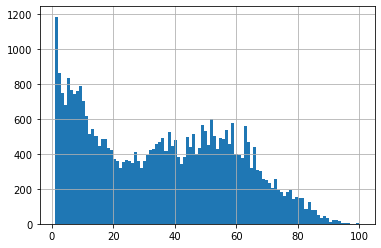

In [33]:
# 남성 연령대 분포도
male_df['Age'].hist(bins=100)

<AxesSubplot:>

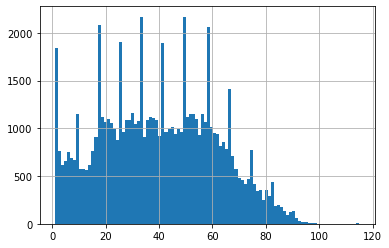

In [34]:
# 여성 연령대 분포도
female_df['Age'].hist(bins=100)

In [35]:
# 연령대 범주를 만들어 파생변수 생성
# 0~19/20~39/40~59/60~79/80이상
import warnings
warnings.filterwarnings(action='ignore')
medical['Age_range'] = ''
medical.loc[(medical['Age'] > 0) & (medical['Age'] < 20), 'Age_range'] = '10대'
medical.loc[(medical['Age'] > 19) & (medical['Age'] < 40), 'Age_range'] = '20~30대'
medical.loc[(medical['Age'] > 39) & (medical['Age'] < 60), 'Age_range'] = '40~50대'
medical.loc[(medical['Age'] > 59) & (medical['Age'] < 80), 'Age_range'] = '60~70대'
medical.loc[(medical['Age'] > 79), 'Age_range'] = '80대이상'
medical['Age_range'].value_counts()

40~50대    30072
20~30대    28870
10대       26872
60~70대    17810
80대이상      3363
Name: Age_range, dtype: int64

In [36]:
# 성별별로 연령대 환자수가 얼마나 많은지 살펴보기
gender_age = medical.groupby(['Gender','Age_range']).agg({'Gender':'count'}).rename(columns={'Gender':'Counts'})
gender_age = gender_age.reset_index()
gender_age

,Gender,Age_range,Counts
0,F,10대,14356
1,F,20~30대,20897
2,F,40~50대,20578
3,F,60~70대,12003
4,F,80대이상,2284
5,M,10대,12516
6,M,20~30대,7973
7,M,40~50대,9494
8,M,60~70대,5807
9,M,80대이상,1079


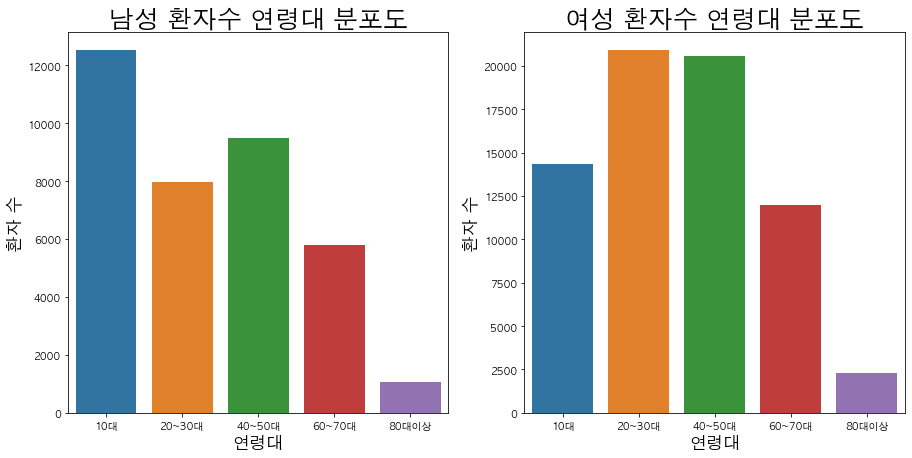

In [37]:
plt.rcParams['font.family'] = 'AppleGothic'
fig ,axes = plt.subplots(nrows=1, ncols=2,figsize=(15,7))

sns.barplot(data=gender_age[gender_age['Gender']=='M'],
           x='Age_range', y='Counts', ax=axes[0])
sns.barplot(data=gender_age[gender_age['Gender']=='F'],
           x='Age_range', y='Counts', ax=axes[1])

axes[0].set_title('남성 환자수 연령대 분포도', fontsize=25)
axes[0].set_xlabel('연령대', fontsize=17)
axes[0].set_ylabel('환자 수', fontsize=17)
axes[1].set_title('여성 환자수 연령대 분포도', fontsize=25)
axes[1].set_xlabel('연령대', fontsize=17)
axes[1].set_ylabel('환자 수', fontsize=17)
plt.show()

- 남성은 10대 환자수 비율이 압도적으로 많다. 다음 중년층이 40-50대, 그리고 20~30대였다.
- 여성은 오히려 20-30대가 가장 많은 비율을 기록했고 근소한 차이로 40~50대 그 다음이 10대였다.

### 성별에 따라 어떤 질환에 많이 앓고 있는지 살펴보기

In [38]:
# 성별에 따라 어떤 질병에 걸린사람들이 얼마나 많은지 살펴보기
# 해당 질병에 걸렸으면 1, 아니면 0이기 때문에 합계를 이용해서 걸린 환자수 파악 가능
# margins 기능은 pivot_table에 있음!
gender_disease = medical.groupby('Gender').agg({'Hipertension':'sum','Diabetes':'sum','Alcoholism':'sum',
                              'Handcap':'sum'})
gender_disease

,Hipertension,Diabetes,Alcoholism,Handcap
Gender,,,,
F,15339,5606,1223,1403
M,6462,2337,2137,1055


In [39]:
gender_disease = gender_disease.stack()
gender_disease = gender_disease.reset_index()
gender_disease = gender_disease.rename(columns={'level_1':'Disease', 0:'Counts'})
gender_disease

,Gender,Disease,Counts
0,F,Hipertension,15339
1,F,Diabetes,5606
2,F,Alcoholism,1223
3,F,Handcap,1403
4,M,Hipertension,6462
5,M,Diabetes,2337
6,M,Alcoholism,2137
7,M,Handcap,1055


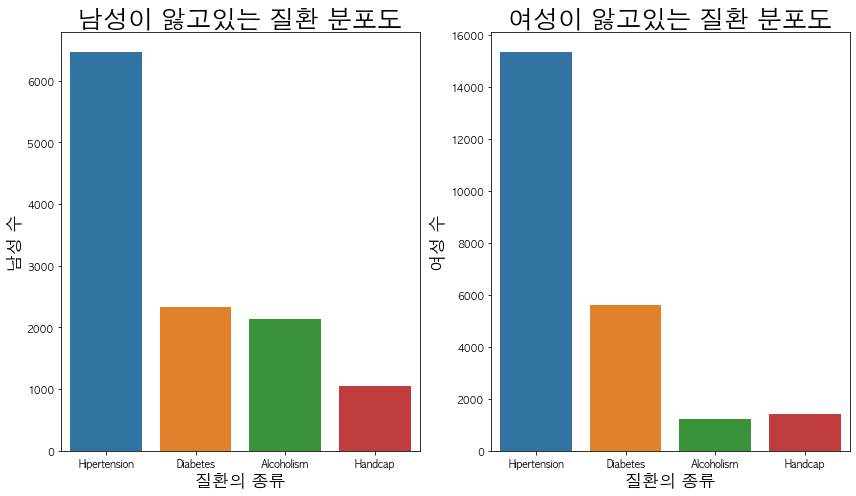

In [40]:
fig, axes = plt.subplots(figsize=(12,7), nrows=1, ncols=2)

sns.barplot(data=gender_disease[gender_disease.Gender == 'M'],
            x='Disease', y='Counts', ax=axes[0])
sns.barplot(data=gender_disease[gender_disease.Gender == 'F'],
           x='Disease', y='Counts', ax=axes[1])
axes[0].set_title('남성이 앓고있는 질환 분포도', fontsize=25)
axes[0].set_xlabel('질환의 종류', fontsize=17)
axes[0].set_ylabel('남성 수', fontsize=17)

axes[1].set_title('여성이 앓고있는 질환 분포도', fontsize=25)
axes[1].set_xlabel('질환의 종류', fontsize=17)
axes[1].set_ylabel('여성 수', fontsize=17)
# tight_layout으로 그래프 간격 알맞게 넓히기(글자 짤리지 않도록하기 위함)
fig.tight_layout()
plt.show()

- 남성, 여성 모두 고혈압이 압도적으로 비율이 높았다. 다음은 당뇨병이 가장 높았다.
- **남성은 여성과 달리 알고올 중독 비율이 상당히 높았다는 것이 남,여 간의 차이점**

### 어떤 날짜에 진료예약이 많은지 살펴보기

In [41]:
# 우선 No-show를 하지 않아야 병원 매출에 완전하게 기여하기 떄문에 No-show가 'No' label인 데이터들만 추출
show_df = medical[medical['No-show']=='No']
print(show_df.shape)

(85307, 14)


In [42]:
# 진료등록하는 날인 AppointmentDay를 기준으로 살펴보자.
# 헷갈릴수 있으니 진료방문날인 ScheduledDay 변수를 제거하자. 이를 제거해도 되는 이유는 No-show에서 No label인 데이터만 갖고왔기 때문에 향후 진료방문한 것이 보장되기 때문
del show_df['ScheduledDay']

In [43]:
# 날짜형 변수로 바꾸어주기
show_df['AppointmentDay'] = pd.to_datetime(show_df['AppointmentDay'])

In [44]:
# 예약등록한 날의 최솟값과 최댓값을 확인해보면서 날짜 범위를 체크하자
print('날짜 범위 :', show_df['AppointmentDay'].min(), '~', show_df['AppointmentDay'].max())

날짜 범위 : 2016-04-29 00:00:00 ~ 2016-06-08 00:00:00


In [45]:
# 날짜 범위가 매우 적으므로 년도-월-일 자를 기준으로 그룹핑해보자.
date_show = show_df.groupby('AppointmentDay').agg({'Gender':'count'}).rename(columns={'Gender':'Counts'})
date_show.head()

,Counts
AppointmentDay,
2016-04-29,2496
2016-05-02,3381
2016-05-03,3322
2016-05-04,3103
2016-05-05,3335


In [46]:
# 시계열 데이터니 linegraph로 그려보기 
# plotly이용
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)
themes = cf.getThemes()

layout = {
    'title':{
    'text':'Counts of medical appointments per day',
    'font':{
        'size':30,
        'color':'violet',
        'family':'consolas'
    },
    'x':0.5,
    'y':0.9,
    },
    'xaxis':{
        'dtick':'1M'
    }
}

date_show.iplot(kind='scatter', theme='solar', mode='lines+markers', layout=layout)

In [47]:
date_show[date_show['Counts'] < 500]

,Counts
AppointmentDay,
2016-05-14,30


- 2016년 5월 14일에 특이하게 진료건수가 현저하게 낮았다. 30건의 예약등록건수밖에 발생하지 않았다. 무슨일이 있었던 걸까!?

- 시간이 흐를수록 진료건수가 점점 증가하는 추이를 보인다.

In [48]:
medical.to_csv('/Users/younghun/Desktop/gitrepo/data/medical_appointment_final.csv')